In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, KFold, cross_val_score
import matplotlib.pyplot as plt
from sklearn.model_selection import  StratifiedKFold


In [2]:
df=pd.read_csv('/content/nba_stats.csv')
df.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,PF,34,SAS,26,0,22.0,4.2,9.9,0.419,1.6,...,0.767,0.9,4.3,5.2,1.5,0.7,0.5,1.2,1.8,11.2
1,PG,31,DAL,80,31,27.4,3.5,8.5,0.406,0.8,...,0.847,0.5,2.8,3.2,3.6,0.9,0.2,1.5,1.8,9.5
2,C,25,MIL,57,1,16.8,2.9,5.1,0.564,0.0,...,0.590,1.5,2.4,3.9,0.9,0.3,1.9,1.1,2.3,7.0
3,PG,24,TOT,41,6,11.6,1.3,3.6,0.377,0.4,...,0.800,0.2,1.0,1.1,1.5,0.3,0.2,0.6,0.7,3.3
4,PF,25,SAS,14,2,11.8,1.3,2.6,0.500,0.3,...,0.600,0.5,2.6,3.1,0.5,0.0,0.0,0.0,0.4,3.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855 entries, 0 to 854
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pos     855 non-null    object 
 1   Age     855 non-null    int64  
 2   Tm      855 non-null    object 
 3   G       855 non-null    int64  
 4   GS      855 non-null    int64  
 5   MP      855 non-null    float64
 6   FG      855 non-null    float64
 7   FGA     855 non-null    float64
 8   FG%     855 non-null    float64
 9   3P      855 non-null    float64
 10  3PA     855 non-null    float64
 11  3P%     855 non-null    float64
 12  2P      855 non-null    float64
 13  2PA     855 non-null    float64
 14  2P%     855 non-null    float64
 15  eFG%    855 non-null    float64
 16  FT      855 non-null    float64
 17  FTA     855 non-null    float64
 18  FT%     855 non-null    float64
 19  ORB     855 non-null    float64
 20  DRB     855 non-null    float64
 21  TRB     855 non-null    float64
 22  AS

In [4]:
print ("nba.keys(): {}".format(df.keys()))

nba.keys(): Index(['Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB',
       'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')


In [5]:
print("nba.shape : {}".format(df.shape))

nba.shape : (855, 28)


In [6]:
print(df['Pos'].value_counts())

Pos
SG    192
PF    179
PG    166
SF    160
C     158
Name: count, dtype: int64


In [7]:
# Checking for the missing values
print(df.isnull().sum())
# filling the missing values with mean
player_pos =df.fillna(df.mean(numeric_only=True))

Pos     0
Age     0
Tm      0
G       0
GS      0
MP      0
FG      0
FGA     0
FG%     0
3P      0
3PA     0
3P%     0
2P      0
2PA     0
2P%     0
eFG%    0
FT      0
FTA     0
FT%     0
ORB     0
DRB     0
TRB     0
AST     0
STL     0
BLK     0
TOV     0
PF      0
PTS     0
dtype: int64


In [8]:
label_encoder = LabelEncoder()

# Assuming 'df' is your dataframe containing the 'pos' and 'tm' columns

# Apply label encoding to the 'pos' column (position)
pos_num = {'SG': 0, 'PG': 0, 'SF': 1, 'PF': 2, 'C': 2}
df['Pos'] = df['Pos'].map(pos_num)

# Apply label encoding to the 'tm' column (team)
df['Tm'] = label_encoder.fit_transform(df['Tm'])
df.head()

,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,2,34,26,26,0,22.0,4.2,9.9,0.419,1.6,...,0.767,0.9,4.3,5.2,1.5,0.7,0.5,1.2,1.8,11.2
1,0,31,6,80,31,27.4,3.5,8.5,0.406,0.8,...,0.847,0.5,2.8,3.2,3.6,0.9,0.2,1.5,1.8,9.5
2,2,25,16,57,1,16.8,2.9,5.1,0.564,0.0,...,0.590,1.5,2.4,3.9,0.9,0.3,1.9,1.1,2.3,7.0
3,0,24,28,41,6,11.6,1.3,3.6,0.377,0.4,...,0.800,0.2,1.0,1.1,1.5,0.3,0.2,0.6,0.7,3.3
4,2,25,26,14,2,11.8,1.3,2.6,0.500,0.3,...,0.600,0.5,2.6,3.1,0.5,0.0,0.0,0.0,0.4,3.5


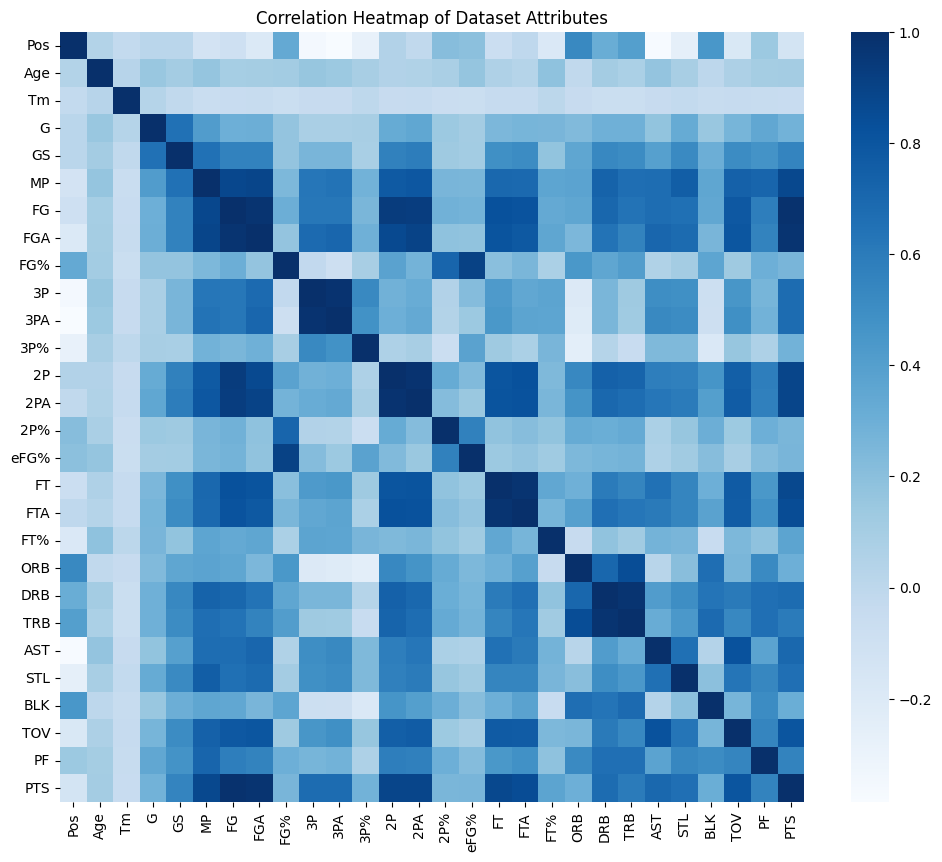

In [9]:
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['number'])

correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))

heat_map = sns.heatmap(correlation_matrix, annot=False, cmap='Blues')

plt.title("Correlation Heatmap of Dataset Attributes")
plt.show()

In [10]:
min_minutes_played = 20

df = df[df['MP'] >= min_minutes_played]

df.drop(['FG%','3P%','2P%','GS','G','Tm'],axis=1,inplace=True)

x=df.drop('Pos',axis=1)
y=df['Pos']

x = x.select_dtypes(include=np.number)

imputer=SimpleImputer(strategy='mean')
x_impdata=imputer.fit_transform(x)

scaler=StandardScaler()
x_scaled=scaler.fit_transform(x_impdata)


<ipython-input-10-f381506442bc>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['FG%','3P%','2P%','GS','G','Tm'],axis=1,inplace=True)


In [11]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=0)


dt= DecisionTreeClassifier(criterion='entropy',splitter='best', max_depth=4, random_state=0)


dt.fit(x_train, y_train)

tr_pred = dt.predict(x_train)
tr_accuracy = accuracy_score(y_train, tr_pred)
print('\n\nTraining accuracy for nba-stats data set:', tr_accuracy * 100, '%')


val_pred = dt.predict(x_test)
val_accuracy = accuracy_score(y_test, val_pred)
print('\n\nValidation accuracy for nba-stats data set:', val_accuracy * 100, '%')


conf_matr = confusion_matrix(y_test, val_pred)
print('\n\nConfusion matrix for nba-stats data set', conf_matr)



Training accuracy for nba-stats data set: 79.82954545454545 %


Validation accuracy for nba-stats data set: 72.72727272727273 %


Confusion matrix for nba-stats data set [[44  8  1]
 [ 8  6  0]
 [ 3  4 14]]


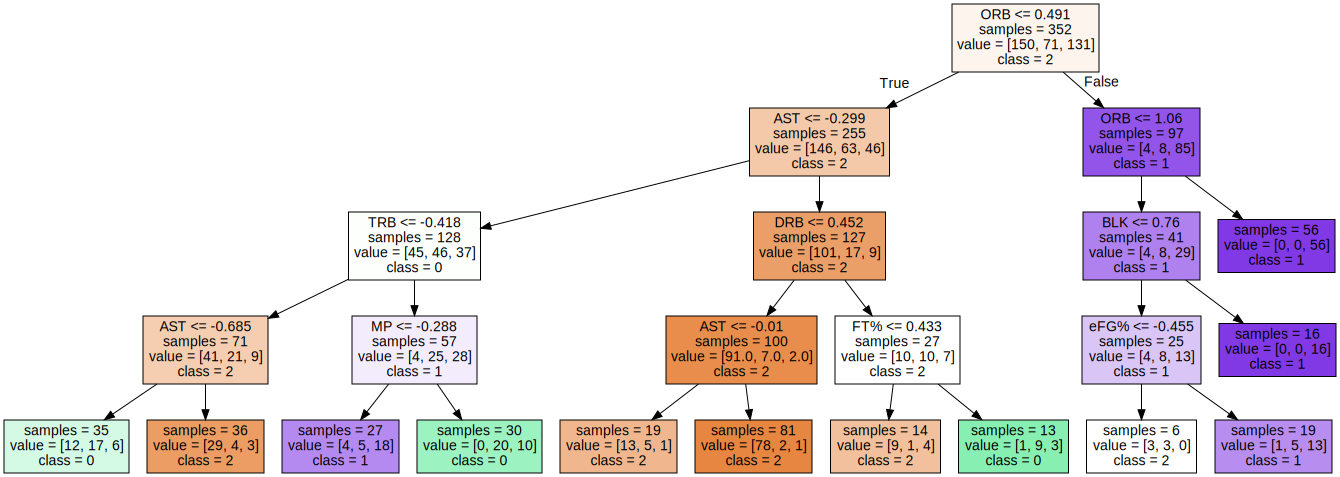

In [12]:
from sklearn.tree import export_graphviz
import graphviz
from IPython.display import display


class_names = [str(label) for label in y.unique()]


export_graphviz(dt, out_file="tree.dot",
                class_names=class_names,
                feature_names=x.columns,
                impurity=False,
                filled=True)


with open("tree.dot") as f:
    dot_graph = f.read()


display(graphviz.Source(dot_graph))

In [13]:

dummy_test = pd.read_csv("dummy_test.csv")

dummy_test['Pos'] = dummy_test['Pos'].map(pos_num)

dummy_test = dummy_test[dummy_test['MP'] >= min_minutes_played]
dummy_test.drop(['FG%','3P%','2P%','GS','G','Tm'], axis=1, inplace=True)

x_dummy = dummy_test.drop('Pos', axis=1)
y_dummy = dummy_test['Pos']


x_dummy = x_dummy.select_dtypes(include=np.number)


x_dummy_impdata = imputer.transform(x_dummy)
x_dummy_scaled = scaler.transform(x_dummy_impdata)

dummy_pred = dt.predict(x_dummy_scaled)
dummy_accuracy = accuracy_score(y_dummy, dummy_pred)
print('\n\nDummy test set accuracy:', dummy_accuracy * 100, '%')

dummy_conf_matr = confusion_matrix(y_dummy, dummy_pred)
print('\n\nConfusion matrix for dummy test set:\n', dummy_conf_matr)




Dummy test set accuracy: 68.51851851851852 %


Confusion matrix for dummy test set:
 [[18  2  1]
 [ 9  9  2]
 [ 1  2 10]]


In [14]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=4, random_state=0)


kfold_scores = cross_val_score(dt, x_scaled, y, cv=10)


print("Cross-validation scores: {}".format(kfold_scores))


print("Average cross-validation score: {:.2f}".format(kfold_scores.mean()))


Cross-validation scores: [0.77272727 0.61363636 0.63636364 0.72727273 0.63636364 0.63636364
 0.65909091 0.61363636 0.72727273 0.75      ]
Average cross-validation score: 0.68
